<a href="https://colab.research.google.com/github/dolcejw324/Python-Tool-Sample-py3/blob/main/Lab2_JW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# w10

#Gini coefficient for income in **Texas**
###Install packages

In [4]:
!pip install inequality
!pip install libpysal

     |████████████████████████████████| 2.4 MB 14.4 MB/s 


In [10]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 13.9 MB/s 
     |████████████████████████████████| 6.3 MB 60.9 MB/s 
     |████████████████████████████████| 16.7 MB 47.5 MB/s 


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
import sys
import os
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
sys.path.append(os.path.abspath('..'))
import inequality
import libpysal

/usr/local/lib/python3.7/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [44]:
import pandas as pd

### Import data

In [46]:
!wget https://github.com/gdsbook/book/raw/master/data/us_county_income/uscountypcincome.gpkg
gdf = geopandas.read_file(
    "uscountypcincome.gpkg"
)

--2022-04-03 21:53:48--  https://github.com/gdsbook/book/raw/master/data/us_county_income/uscountypcincome.gpkg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gdsbook/book/master/data/us_county_income/uscountypcincome.gpkg [following]
--2022-04-03 21:53:48--  https://raw.githubusercontent.com/gdsbook/book/master/data/us_county_income/uscountypcincome.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1888256 (1.8M) [application/octet-stream]
Saving to: ‘uscountypcincome.gpkg.2’

uscountypcincome.gp 100%[===================>]   1.80M  --.-KB/s    in 0.02s   

2022-04-03 21:53:48 (81.9 MB/s) - 

In [48]:
gdf.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2012,2013,2014,2015,2016,2017,index,IndustryCl,Descript_1,geometry
0,55,111,01581115,55111,Sauk,Sauk County,06,H1,G4020,357,...,39988,40655,42668,44255,44540,45847,NaN,None,None,"POLYGON ((-90.19196 43.55500, -90.31107 43.553..."
1,55,093,01581107,55093,Pierce,Pierce County,06,H1,G4020,378,...,39121,39367,41626,43539,43488,44636,NaN,None,None,"POLYGON ((-92.69454 44.68874, -92.73204 44.714..."


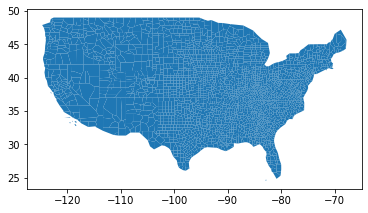

In [49]:
gdf.plot()

In [50]:
gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'GeoFIPS', 'GeoName', 'Region',
       'TableName', 'LineCode', 'Descriptio', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'index', 'IndustryCl', 'Descript_1', 'geometry'],
      dtype='object')

In [51]:
gdf['ave'] = gdf[['1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017']].mean(axis=1)

In [52]:
gdf.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,2013,2014,2015,2016,2017,index,IndustryCl,Descript_1,geometry,ave
0,55,111,01581115,55111,Sauk,Sauk County,06,H1,G4020,357,...,40655,42668,44255,44540,45847,NaN,None,None,"POLYGON ((-90.19196 43.55500, -90.31107 43.553...",21503.020408
1,55,093,01581107,55093,Pierce,Pierce County,06,H1,G4020,378,...,39367,41626,43539,43488,44636,NaN,None,None,"POLYGON ((-92.69454 44.68874, -92.73204 44.714...",20817.163265
2,55,063,01581091,55063,La Crosse,La Crosse County,06,H1,G4020,None,...,41230,43637,45067,45985,47134,NaN,None,None,"POLYGON ((-91.34774 43.91196, -91.42519 43.984...",21840.224490


### Check null data

In [75]:
pd.isnull(gdf['ave']).sum()

0

In [76]:
pd.isnull(gdf['1969']).sum()

0

* Plot 1969 income data in Texas

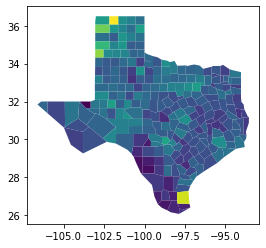

In [78]:
gdf.query('STATEFP == "48"').plot(column='1969')

In [ ]:
gdf.query('STATEFP == "48"').plot(column='1969')

In [ ]:
!pip install mapclassify
import mapclassify

### Extract Texas

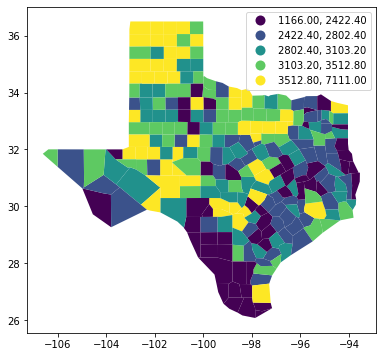

In [82]:
ax = gdf.query('STATEFP == "48"').plot(column='1969',k=5,scheme='Quantiles',legend=True, figsize=(8, 6))

### Compare Gini coefficient

#### Gini index for the Average of incomes for 10 years is lower than that for 1969

*   1969



In [83]:
gini_6917 = inequality.gini.Gini(gdf['1969'])
gini_6917.g

0.13556175504269904

*   Average

In [84]:
gini_6917 = inequality.gini.Gini(gdf['ave'])
gini_6917.g

0.11447751826761354

In [170]:
years = range(1969, 2017, 1)
years

range(1969, 2017)

* Calculate all Gini index for all years

In [171]:
ginis = [inequality.gini.Gini(gdf["%s"%year]).g for year in years]

In [172]:
ginis

[0.13556175504269904,
 0.1300761865002413,
 0.12854046482992282,
 0.12912578558442878,
 0.14216639327148717,
 0.13057882164455267,
 0.1305130423191487,
 0.11741157074944074,
 0.11748216577341722,
 0.11536551539469958,
 0.11563569845552794,
 0.12297693820004625,
 0.11653561658913272,
 0.1168736759049446,
 0.11935708852903104,
 0.11668208725884993,
 0.11802608369587281,
 0.11888034246633297,
 0.1189610993450939,
 0.1220452309556147,
 0.11805047573157151,
 0.11707939015537422,
 0.11255772722503728,
 0.10918813430663393,
 0.11116046798851413,
 0.1083898157626835,
 0.11156357325711187,
 0.11422816911924405,
 0.11361317309640959,
 0.11806132790694866,
 0.12029552156971714,
 0.12371117642882819,
 0.11988089102228272,
 0.11847636344123859,
 0.1178576182016522,
 0.11788566538668083,
 0.12053894741399139,
 0.1278347273359736,
 0.1289799133745558,
 0.13164372720489045,
 0.11954194169228749,
 0.12258837917271996,
 0.1346396889927435,
 0.1385651589855053,
 0.13903851720028612,
 0.13895220159815924,

In [173]:
inequality.gini.Gini_Spatial

inequality.gini.Gini_Spatial

### Import transportation data

In [105]:
!pip install censusdata
import censusdata
df = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '48'), ('county', '*')]),
           ['B08301_001E', 'B08301_003E', 'B08301_019E', 'B08301_018E'])

     |████████████████████████████████| 26.6 MB 60.1 MB/s 
  Created wheel for censusdata: filename=CensusData-1.15.post1-py3-none-any.whl size=28205763 sha256=e18f331c4e294ddfb1c88286b9918cf41bd9b56f5750c4959d1d08031a71043e
  Stored in directory: /root/.cache/pip/wheels/2f/72/16/5c8e185711751db7fa81da8c6329c8b3d82c0582a51a0f1e85
Successfully built censusdata


In [111]:
df = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '48'), ('county', '*')]),
           ['B08301_001E', 'B08301_003E', 'B08301_019E', 'B08301_018E'])

In [112]:
column_names = ['total_transpo', 'total_mv', 'total_walk', 'total_bike']
df.columns = column_names

In [113]:
df['percent_mv'] = df.apply(
   lambda row: row['total_mv']/row['total_transpo']*100, 
   axis = 1)
df['percent_walk'] = df.apply(
   lambda row: row['total_walk']/row['total_transpo']*100, 
   axis = 1)
df['percent_bike'] = df.apply(
   lambda row: row['total_bike']/row['total_transpo']*100, 
   axis = 1)

In [114]:
new_indices = []
county_names = []
for index in df.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
df.index = new_indices
df['county_name'] = county_names

In [122]:
tx_gdf = gdf.query('STATEFP == "48"')
tx_gdf.head(2)
tx_gdf['FIPS'] = tx_gdf['GEOID']

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [115]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'FIPS'})
df.head()
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

,FIPS,total_transpo,total_mv,total_walk,total_bike,percent_mv,percent_walk,percent_bike,county_name
0,48075,2517,2262,33,0,89.868892,1.311085,0.000000,Childress County
1,48091,53161,42821,587,8,80.549651,1.104193,0.015049,Comal County
2,48225,7570,6158,111,0,81.347424,1.466314,0.000000,Houston County
3,48349,19513,15923,289,39,81.602009,1.481064,0.199867,Navarro County
4,48415,7324,6200,92,7,84.653195,1.256144,0.095576,Scurry County


In [128]:
sj_gdf = tx_gdf.join(df.set_index('FIPS'), how='inner', on='FIPS')

In [132]:
sj_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'GeoFIPS', 'GeoName', 'Region',
       'TableName', 'LineCode', 'Descriptio', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'index', 'IndustryCl', 'Descript_1', 'geometry', 'ave', 'FIPS',
       'total_transpo', 'total_mv', 'total_walk', 'total_bike', 'percent_mv',
       'percent_walk', 'percent_bike', 'county_name'],
      dtype='object')

In [182]:
walk = sj_gdf['percent_walk']
pd.isnull(sj_gdf['percent_walk']).sum()

0

In [138]:
w = libpysal.weights.block_weights(walk)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 197 disconnected components.
 There are 153 islands with ids: 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 33, 34, 36, 43, 44, 47, 48, 50, 52, 53, 55, 56, 57, 62, 63, 64, 66, 67, 68, 70, 71, 72, 73, 78, 79, 80, 82, 84, 85, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 112, 115, 116, 118, 119, 124, 125, 126, 127, 128, 129, 131, 136, 138, 140, 141, 144, 145, 147, 148, 150, 153, 155, 156, 157, 158, 160, 164, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 184, 185, 186, 187, 189, 191, 192, 196, 198, 199, 202, 204, 205, 206, 207, 208, 210, 216, 217, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 233, 234, 236, 238, 241, 242, 243, 244, 245, 247, 248, 251, 252.
  warnings.warn(message)


#### Plot maps

* Choropleth map for the percentage of walk

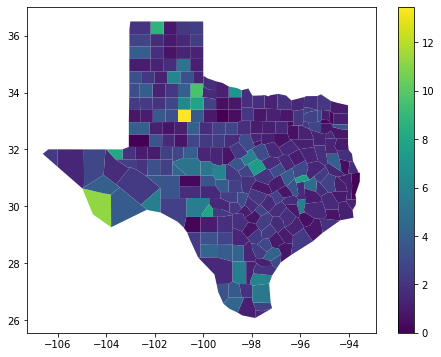

In [147]:
ax = sj_gdf.plot(column='percent_walk', categorical=False, legend=True, figsize=(8, 6))

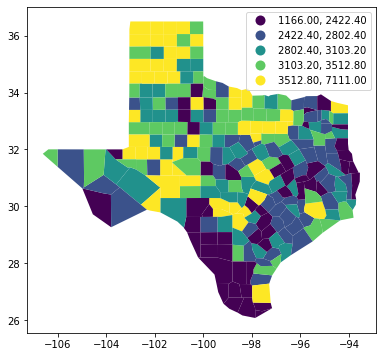

In [148]:
ax = gdf.query('STATEFP == "48"').plot(column='1969',k=5,scheme='Quantiles',legend=True, figsize=(8, 6))

In [165]:
import numpy as np
np.random.seed(1234)
gs = inequality.gini.Gini_Spatial(sj_gdf['1969'],w)

In [166]:
gs.p_sim

0.15

In [176]:
gs_all = [ inequality.gini.Gini_Spatial(sj_gdf["%s"%year], w) for year in years]

In [178]:
p_values = [gs.p_sim for gs in gs_all]
p_values

[0.12,
 0.15,
 0.24,
 0.12,
 0.1,
 0.25,
 0.25,
 0.3,
 0.26,
 0.02,
 0.42,
 0.06,
 0.31,
 0.22,
 0.34,
 0.32,
 0.26,
 0.07,
 0.49,
 0.42,
 0.31,
 0.37,
 0.39,
 0.47,
 0.45,
 0.21,
 0.05,
 0.22,
 0.24,
 0.16,
 0.23,
 0.18,
 0.38,
 0.24,
 0.32,
 0.03,
 0.22,
 0.24,
 0.33,
 0.22,
 0.33,
 0.41,
 0.43,
 0.43,
 0.44,
 0.42,
 0.22,
 0.29]

Populating the interactive namespace from numpy and matplotlib


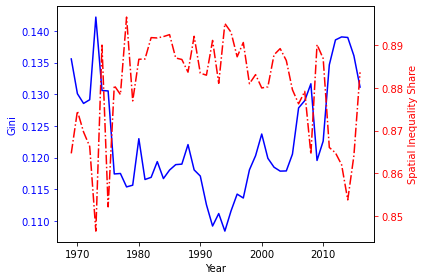

In [181]:
wgs = [gs.wcg_share for gs in gs_all]
bgs = [ 1 - wg for wg in wgs]
%pylab inline
years = np.array(years)

fig, ax1 = plt.subplots()
t = years
s1 = ginis
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Gini', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = bgs
ax2.plot(t, s2, 'r-.')
ax2.set_ylabel('Spatial Inequality Share', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()


# w11

#Spatial Autocorrelation
###Install packages

In [193]:
!pip install esda
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

     |████████████████████████████████| 95 kB 3.9 MB/s 
  Created wheel for esda: filename=esda-2.4.1-py3-none-any.whl size=117429 sha256=0ab45c2e72d7d1b3ea79d06b5c3b441a145471bd319c7b48bb43f2d85e0d1f1b
  Stored in directory: /root/.cache/pip/wheels/ed/67/c5/4558a178be4c410f341c31f71b5aba9c761a40c9d17dbdfddd
Successfully built esda


In [194]:
sj_gdf.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,ave,FIPS,total_transpo,total_mv,total_walk,total_bike,percent_mv,percent_walk,percent_bike,county_name
2448,48,327,01383949,48327,Menard,Menard County,06,H1,G4020,None,...,16488.408163,48327,797,588,28,0,73.776662,3.513174,0.000000,Menard County
2449,48,189,01383880,48189,Hale,Hale County,06,H1,G4020,352,...,16909.551020,48189,13848,11401,177,19,82.329578,1.278163,0.137204,Hale County


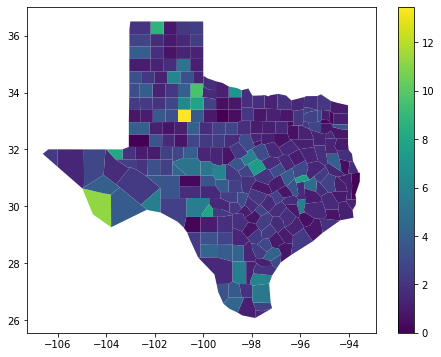

In [195]:
sj_gdf.plot(column='percent_walk', legend=True, figsize=(8, 6))

In [196]:
df = sj_gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [198]:
y = df['percent_walk']
ylag = lps.weights.lag_spatial(wq, y)
ylag

array([3.41215061, 2.39660756, 2.55670003, 2.29618588, 2.97982374,
       0.83702371, 1.73122215, 1.87956977, 3.679759  , 1.86167988,
       3.42796433, 2.7702896 , 2.20216805, 3.10081295, 1.14044755,
       2.69776351, 2.73171433, 3.21259415, 3.58630312, 1.22162525,
       4.52271826, 2.23072881, 2.09562878, 1.28737805, 2.26208783,
       2.0403342 , 1.88439324, 3.11216181, 2.07536376, 2.93412833,
       5.24450291, 2.78963921, 2.8437293 , 2.04861016, 1.41517473,
       2.99617412, 1.93459005, 2.9719296 , 1.66782936, 3.25165631,
       3.02579117, 1.58476036, 2.53963281, 2.42452125, 1.91481696,
       2.78202138, 1.70953266, 0.8825194 , 2.54232884, 3.1759848 ,
       1.45592434, 2.14056945, 2.4189403 , 1.82022685, 1.78897629,
       3.11592095, 1.89431201, 2.06425425, 1.23382366, 1.62950755,
       1.59589558, 2.45696195, 2.04896542, 1.25154055, 3.40046824,
       1.95072049, 1.1994    , 2.61132013, 1.37129489, 1.89536269,
       2.36741932, 1.22114714, 2.1258016 , 2.69171705, 1.32072

In [199]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

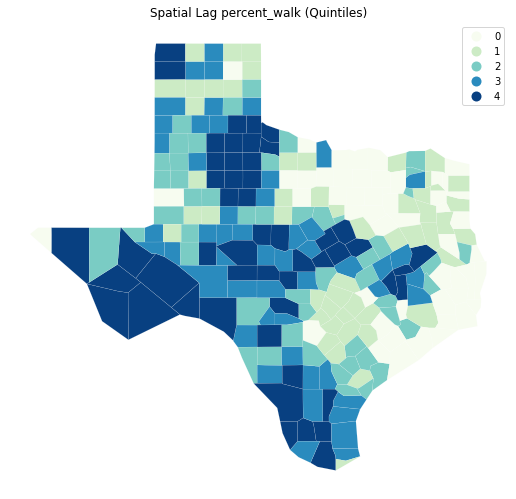

In [201]:

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag percent_walk (Quintiles)")

plt.show()

* The quintile map for the spatial lag tends to enhance the impression of value similarity in space. It is, in effect, a local smoother.

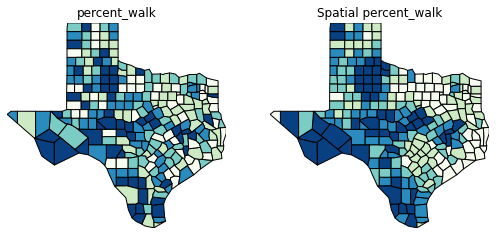

In [204]:
df['lag_percent_walk'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='percent_walk', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("percent_walk")
df.plot(column='lag_percent_walk', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial percent_walk")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

* However, we still have the challenge of visually associating the value of the percentage of walking in a neighborhod with the value of the spatial lag of values. 
* To complement the geovisualization of these associations we can turn to formal statistical measures of spatial autocorrelation.

In [206]:
y.median()

1.879044984171517

In [207]:
yb = y > y.median()
sum(yb)

127

* Countinous data

In [222]:
# continous case
wq.transform = 'r'
y = df['percent_walk']

In [223]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.16615885878238848

* Here the observed value is in the upper tail

Text(0.5, 0, "Moran's I")

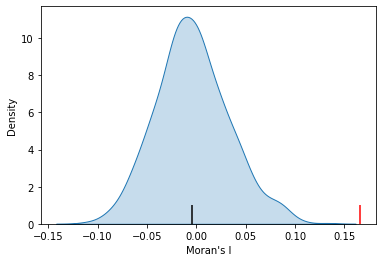

In [237]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

* Computing a pseudo p-value from an MC simulation:

In [238]:
mi.p_sim

0.001

Since this is below conventional significance levels, I would reject the null of complete spatial randomness in favor of spatial autocorrelation in percentage of walking.

* Moran's I is a test for global autocorrelation for a continuous attribute:

In [239]:
np.random.seed(12345)
import esda
wq.transform = 'r'
lag_walk = lps.weights.lag_spatial(wq, df['percent_walk'])

### Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

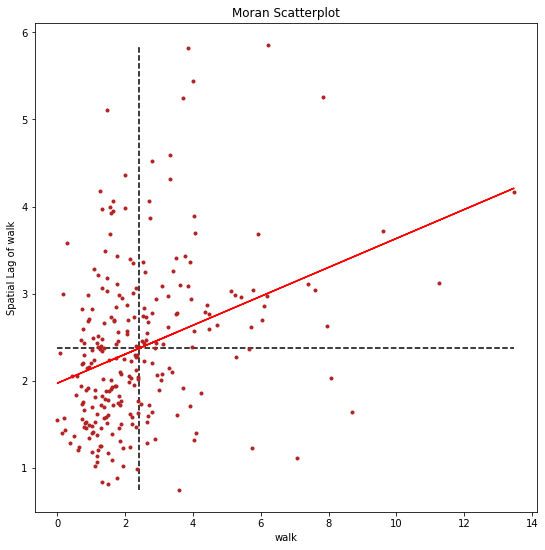

In [240]:
walk = df['percent_walk']
b, a = np.polyfit(walk, lag_walk, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(walk, lag_walk, '.', color='firebrick')

 # dashed vert at mean of the walk
plt.vlines(walk.mean(), lag_walk.min(), lag_walk.max(), linestyle='--')
 # dashed horizontal at mean of lagged walk 
plt.hlines(lag_walk.mean(), walk.min(), walk.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(walk, a + b*walk, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of walk')
plt.xlabel('walk')
plt.show()

In [241]:
li = esda.moran.Moran_Local(y, wq)
li.q
(li.p_sim < 0.05).sum()

47

I distinguished the specific type of local spatial association reflected in the four quadrants of the Moran Scatterplot above:

In [242]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

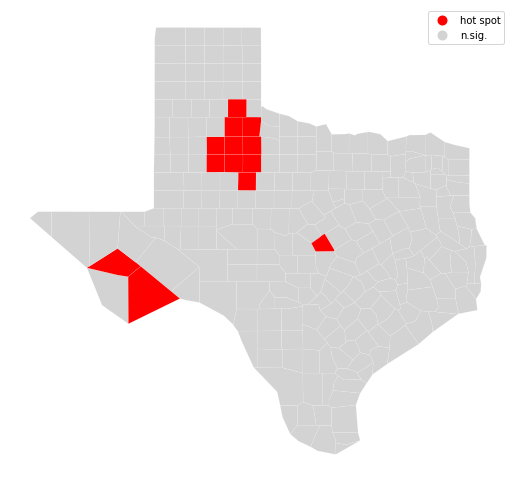

In [246]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

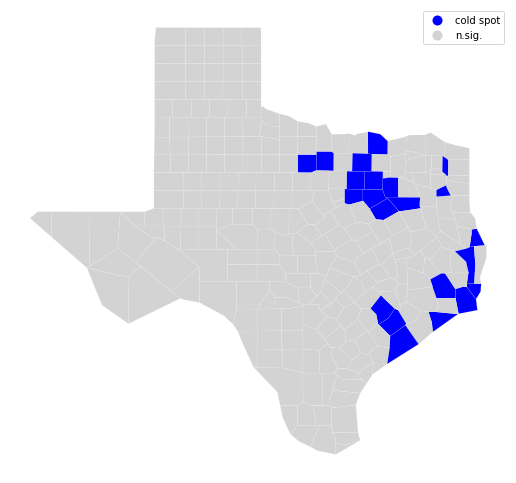

In [247]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

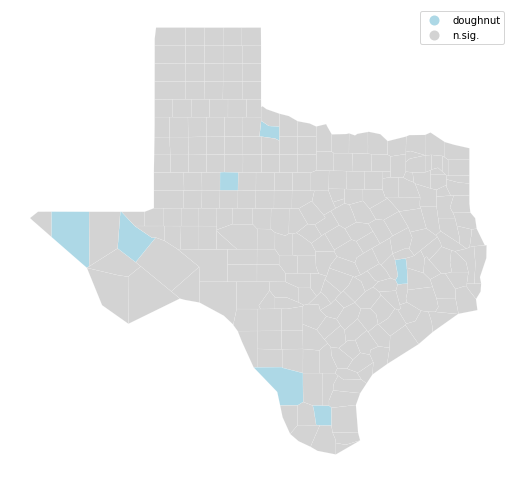

In [248]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

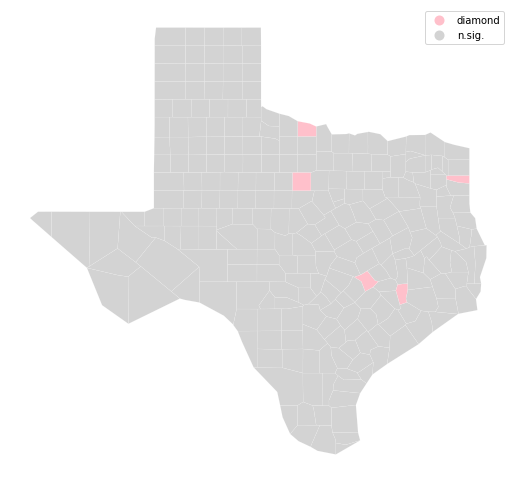

In [250]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [251]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2,
       0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 4, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [275]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [267]:
df['centroid'] = df.geometry.centroid
df = df.to_crs(4326)
df['lon'] = df.centroid.x  
df['lat'] = df.centroid.y
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


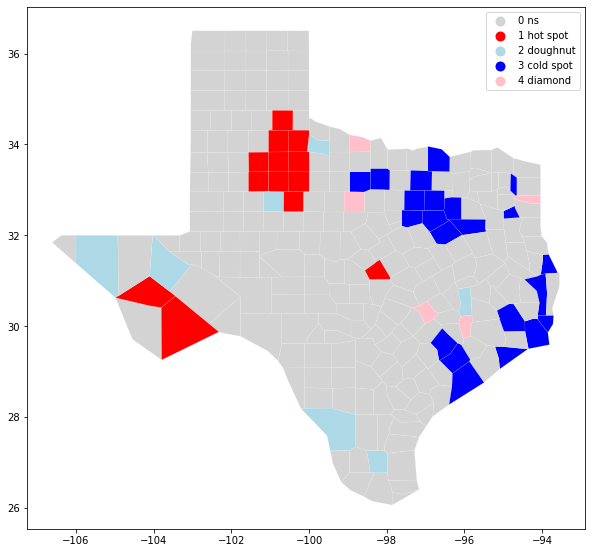

In [291]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(10, 10))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':


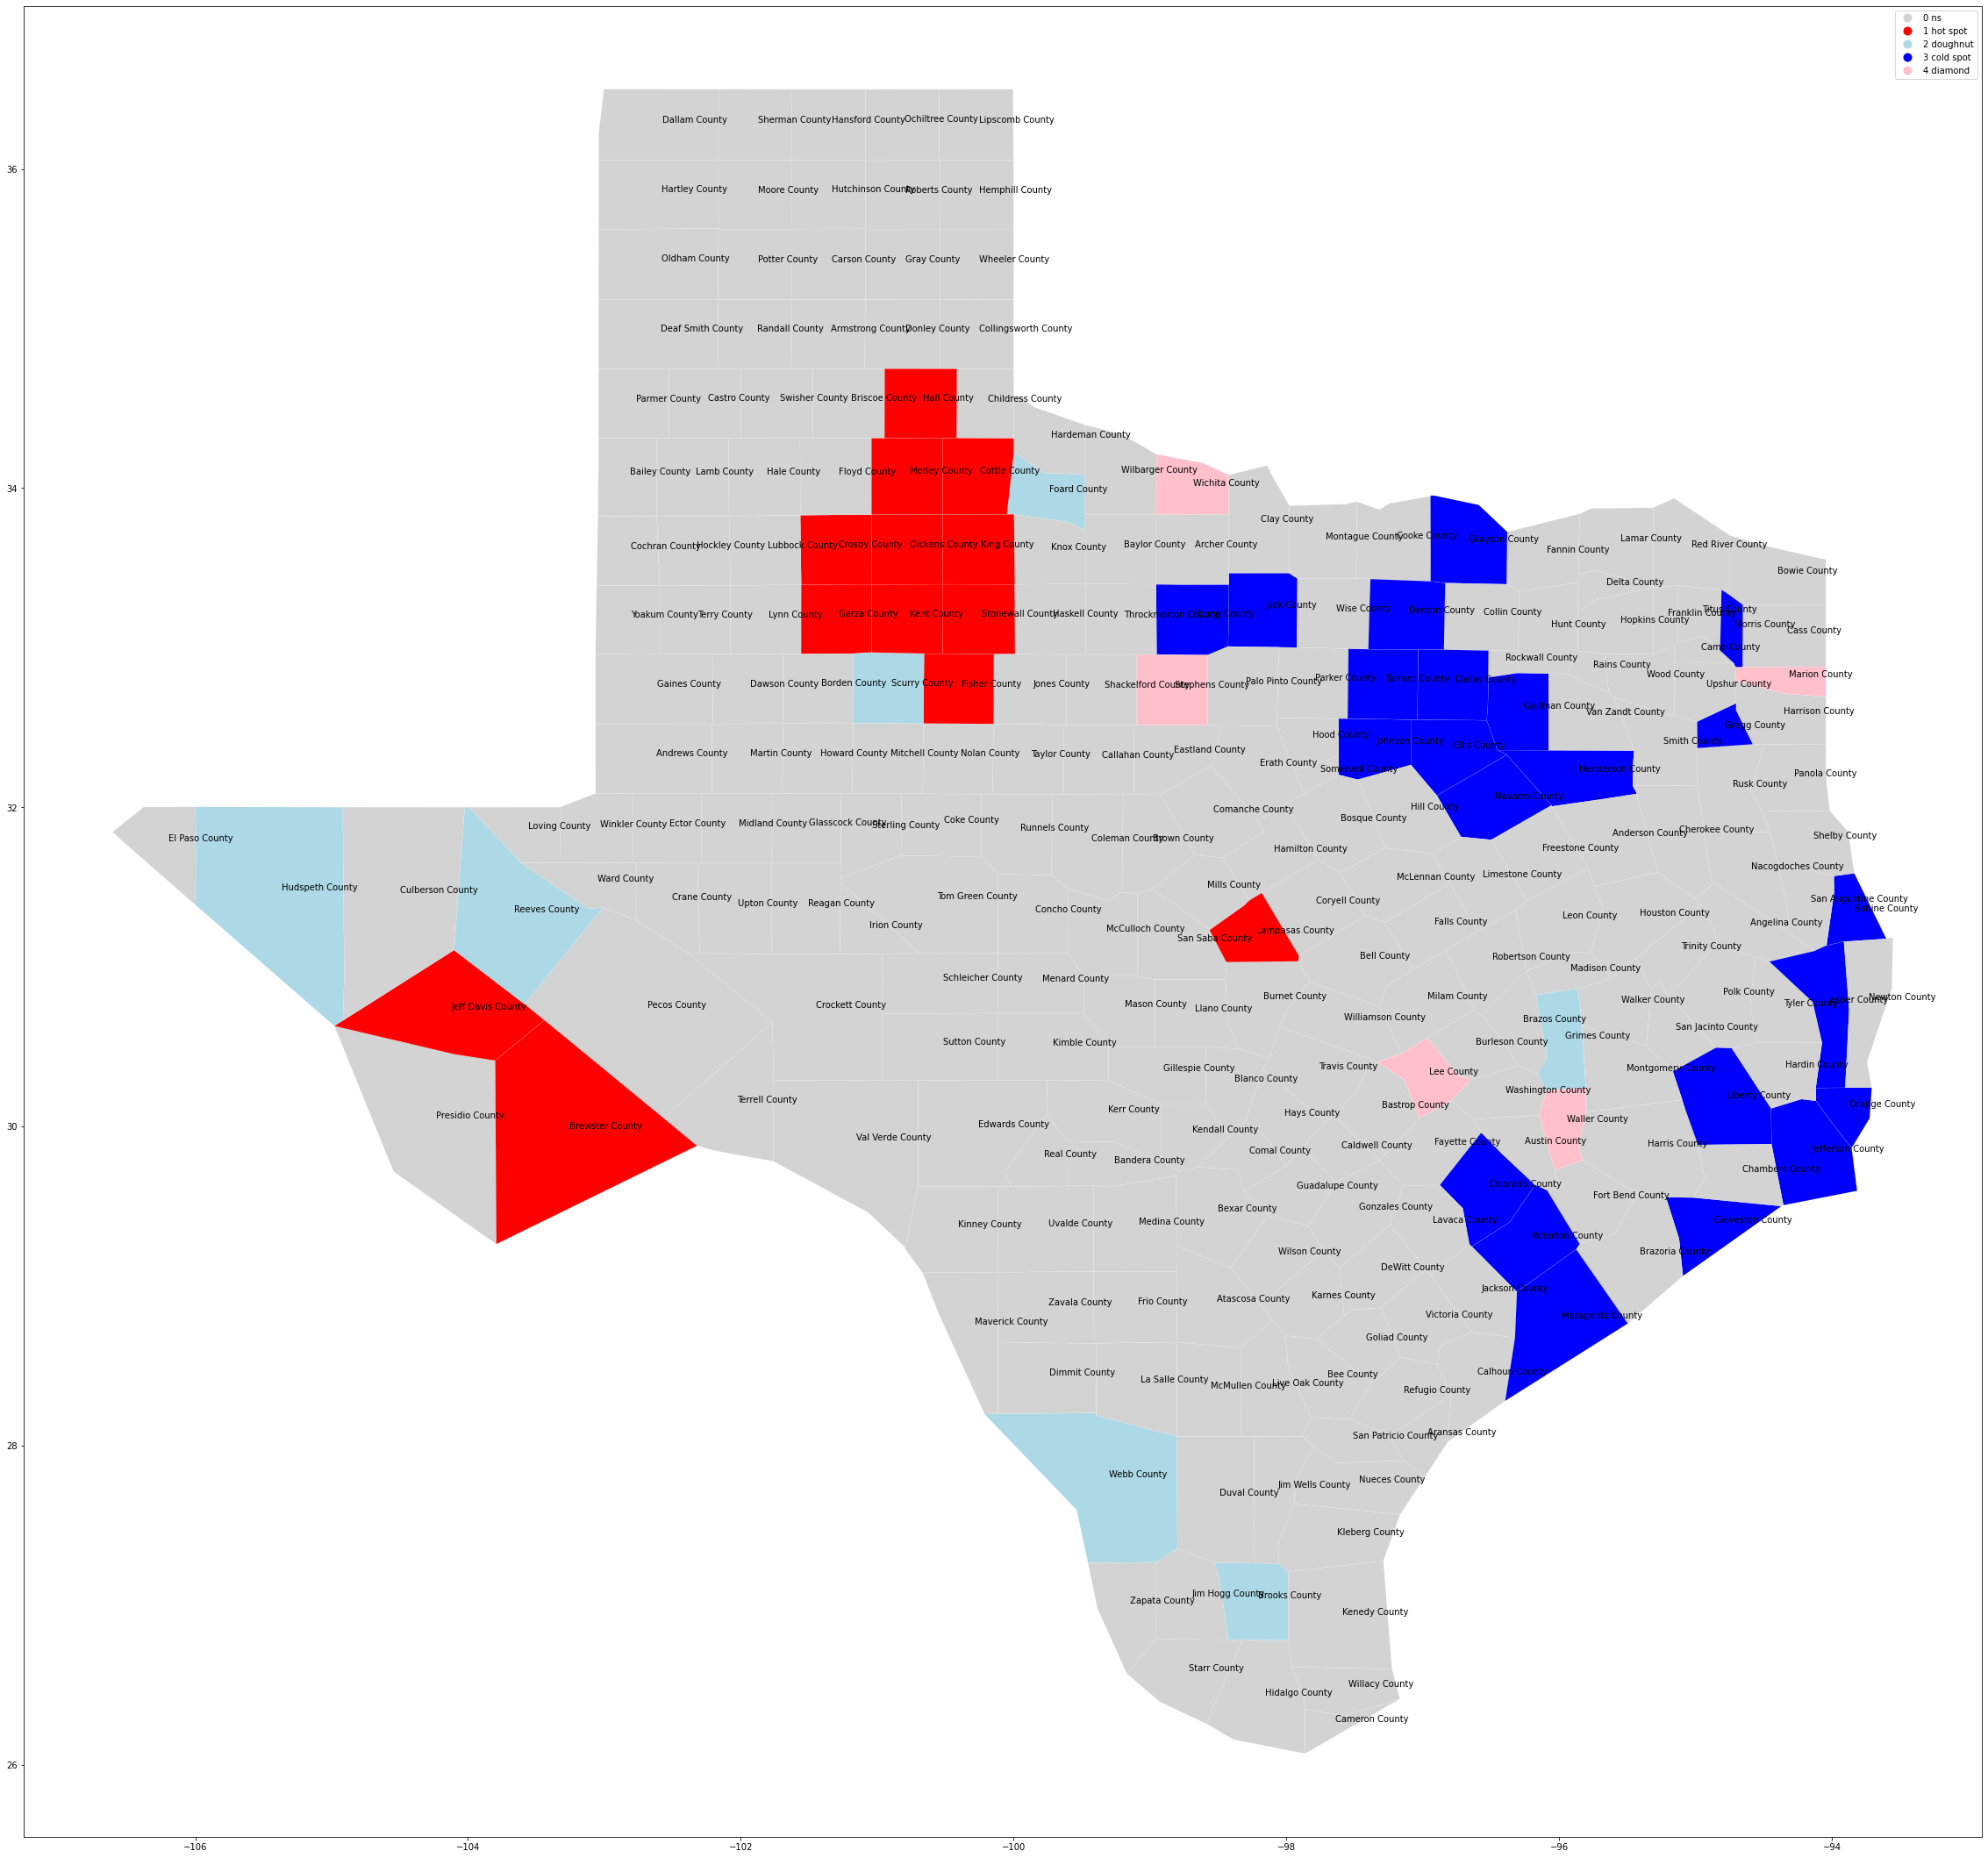

In [290]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(40, 40))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

for x, y, label in zip(df.centroid.x, df.centroid.y, df.county_name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.show()

In [264]:
 df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'GeoFIPS', 'GeoName', 'Region',
       'TableName', 'LineCode', 'Descriptio', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'index', 'IndustryCl', 'Descript_1', 'geometry', 'ave', 'FIPS',
       'total_transpo', 'total_mv', 'total_walk', 'total_bike', 'percent_mv',
       'percent_walk', 'percent_bike', 'county_name', 'lag_median_pri',
       'lag_percent_walk', 'yb'],
      dtype='object')